In [ ]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

In [ ]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

In [ ]:
# load the stock news data
data = pd.read_csv(".........",usecols=[1,2])

In [ ]:
# Let's view the dataset 
data

,Text,d
0,@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...,0.120000
1,"""Delhi government will pay salaries to all con...",-0.033333
2,@nitinbhatia121 NGO to save suffering humanity...,0.000000
3,All of us should participate in Janata curfew ...,0.000000
4,Must watch \nStrong message 🙏🏻 #coronavirusind...,0.433333
...,...,...
177541,"As the cases are rising at a very high speed, ...",0.307394
177542,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendram...,0.032955
177543,"For the first time perhaps, someone to took ti...",0.446429
177544,Odisha reports 129 new #COVID19 positive cases...,0.057576


In [ ]:
# dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177546 entries, 0 to 177545
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Text    177546 non-null  object 
 1   d       173986 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.7+ MB


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [ ]:
# Let's remove punctuations from our dataset 
data['Text Without Punctuation'] = data['Text'].apply(remove_punc)

In [ ]:
data

,Text,d,Text Without Punctuation
0,@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...,0.120000,GHMCOnline CPHydCity MinisterKTR EatalaRajende...
1,"""Delhi government will pay salaries to all con...",-0.033333,Delhi government will pay salaries to all cont...
2,@nitinbhatia121 NGO to save suffering humanity...,0.000000,nitinbhatia121 NGO to save suffering humanity ...
3,All of us should participate in Janata curfew ...,0.000000,All of us should participate in Janata curfew ...
4,Must watch \nStrong message 🙏🏻 #coronavirusind...,0.433333,Must watch \nStrong message 🙏🏻 coronavirusindi...
...,...,...,...
177541,"As the cases are rising at a very high speed, ...",0.307394,As the cases are rising at a very high speed I...
177542,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendram...,0.032955,KAMALSARIN6 ShamikaRavi PMOIndia narendramodi ...
177543,"For the first time perhaps, someone to took ti...",0.446429,For the first time perhaps someone to took tim...
177544,Odisha reports 129 new #COVID19 positive cases...,0.057576,Odisha reports 129 new COVID19 positive cases ...


In [ ]:
data['Text'][2]

'@nitinbhatia121 NGO to save suffering humanity from Corona'

In [ ]:
data['Text Without Punctuation'][2]

'nitinbhatia121 NGO to save suffering humanity from Corona'

In [ ]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove('not')


In [ ]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 1 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# apply pre-processing to the text column
data['Text Without Punc & Stopwords'] = data['Text Without Punctuation'].apply(preprocess)

In [ ]:
data['Text'][0]

'@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Rajender \nI think all restaurants must be closed in Hyderabad, which restricts the people gathering. Please take necessary actions, if restaurants remains open. \nMy sincere thanks for all work you are doing stop 🛑 Corona Virus..🙏🙏🙏 https://t.co/Rjw4r4wDmD'

In [ ]:
data['Text Without Punc & Stopwords'][0]

['ghmconline',
 'cphydcity',
 'ministerktr',
 'eatalarajender',
 'think',
 'restaurants',
 'must',
 'closed',
 'hyderabad',
 'restricts',
 'people',
 'gathering',
 'please',
 'take',
 'necessary',
 'actions',
 'restaurants',
 'remains',
 'open',
 'sincere',
 'thanks',
 'work',
 'stop',
 'corona',
 'virus',
 'httpstcorjw',
 'wdmd']

In [ ]:
data

,Text,d,Text Without Punctuation,Text Without Punc & Stopwords
0,@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...,0.120000,GHMCOnline CPHydCity MinisterKTR EatalaRajende...,"[ghmconline, cphydcity, ministerktr, eatalaraj..."
1,"""Delhi government will pay salaries to all con...",-0.033333,Delhi government will pay salaries to all cont...,"[delhi, government, pay, salaries, contract, w..."
2,@nitinbhatia121 NGO to save suffering humanity...,0.000000,nitinbhatia121 NGO to save suffering humanity ...,"[nitinbhatia, ngo, save, suffering, humanity, ..."
3,All of us should participate in Janata curfew ...,0.000000,All of us should participate in Janata curfew ...,"[us, participate, janata, curfew, proposed, ht..."
4,Must watch \nStrong message 🙏🏻 #coronavirusind...,0.433333,Must watch \nStrong message 🙏🏻 coronavirusindi...,"[must, watch, strong, message, corona, gayacit..."
...,...,...,...,...
177541,"As the cases are rising at a very high speed, ...",0.307394,As the cases are rising at a very high speed I...,"[cases, rising, high, speed, india, among, top..."
177542,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendram...,0.032955,KAMALSARIN6 ShamikaRavi PMOIndia narendramodi ...,"[kamalsarin, shamikaravi, pmoindia, narendramo..."
177543,"For the first time perhaps, someone to took ti...",0.446429,For the first time perhaps someone to took tim...,"[first, time, perhaps, someone, took, time, ac..."
177544,Odisha reports 129 new #COVID19 positive cases...,0.057576,Odisha reports 129 new COVID19 positive cases ...,"[odisha, reports, new, covid, positive, cases,..."


In [ ]:
# join the words into a string
data['Text Without Punc & Stopwords Joined'] = data['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

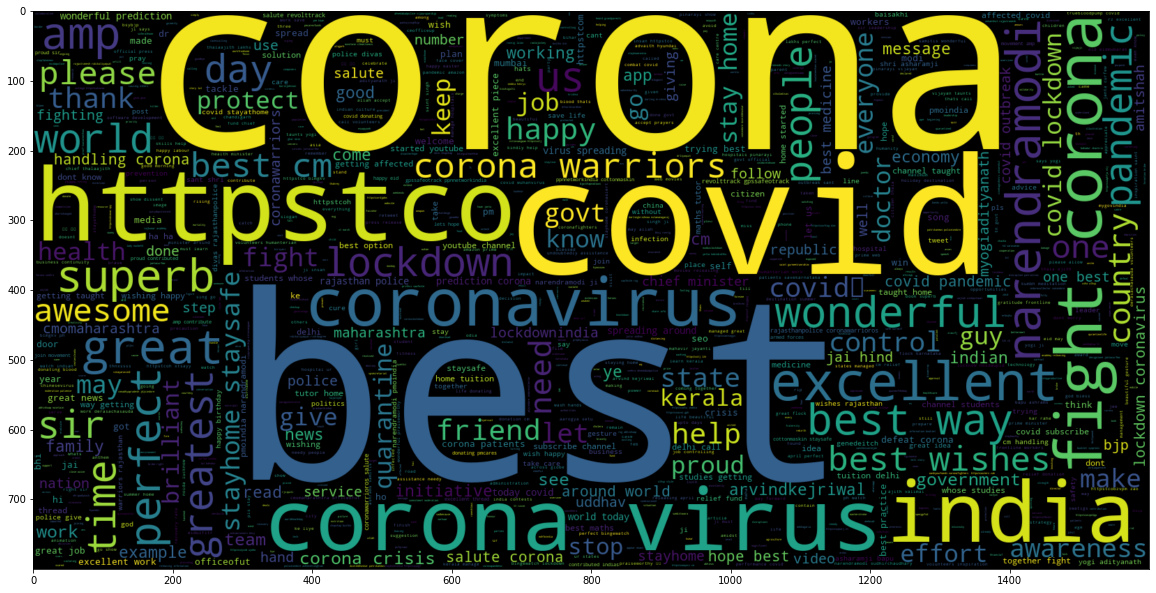

In [ ]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data[data['d'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

In [ ]:
data

,Text,d,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...,0.120000,GHMCOnline CPHydCity MinisterKTR EatalaRajende...,"[ghmconline, cphydcity, ministerktr, eatalaraj...",ghmconline cphydcity ministerktr eatalarajende...
1,"""Delhi government will pay salaries to all con...",-0.033333,Delhi government will pay salaries to all cont...,"[delhi, government, pay, salaries, contract, w...",delhi government pay salaries contract workers...
2,@nitinbhatia121 NGO to save suffering humanity...,0.000000,nitinbhatia121 NGO to save suffering humanity ...,"[nitinbhatia, ngo, save, suffering, humanity, ...",nitinbhatia ngo save suffering humanity corona
3,All of us should participate in Janata curfew ...,0.000000,All of us should participate in Janata curfew ...,"[us, participate, janata, curfew, proposed, ht...",us participate janata curfew proposed httpstco...
4,Must watch \nStrong message 🙏🏻 #coronavirusind...,0.433333,Must watch \nStrong message 🙏🏻 coronavirusindi...,"[must, watch, strong, message, corona, gayacit...",must watch strong message corona gayacity vvi ...
...,...,...,...,...,...
177541,"As the cases are rising at a very high speed, ...",0.307394,As the cases are rising at a very high speed I...,"[cases, rising, high, speed, india, among, top...",cases rising high speed india among top countr...
177542,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendram...,0.032955,KAMALSARIN6 ShamikaRavi PMOIndia narendramodi ...,"[kamalsarin, shamikaravi, pmoindia, narendramo...",kamalsarin shamikaravi pmoindia narendramodi d...
177543,"For the first time perhaps, someone to took ti...",0.446429,For the first time perhaps someone to took tim...,"[first, time, perhaps, someone, took, time, ac...",first time perhaps someone took time acknowled...
177544,Odisha reports 129 new #COVID19 positive cases...,0.057576,Odisha reports 129 new COVID19 positive cases ...,"[odisha, reports, new, covid, positive, cases,...",odisha reports new covid positive cases taking...


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# word_tokenize is used to break up a string into words
print(data['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(data['Text Without Punc & Stopwords Joined'][0]))

ghmconline cphydcity ministerktr eatalarajender think restaurants must closed hyderabad restricts people gathering please take necessary actions restaurants remains open sincere thanks work stop corona virus httpstcorjw wdmd
['ghmconline', 'cphydcity', 'ministerktr', 'eatalarajender', 'think', 'restaurants', 'must', 'closed', 'hyderabad', 'restricts', 'people', 'gathering', 'please', 'take', 'necessary', 'actions', 'restaurants', 'remains', 'open', 'sincere', 'thanks', 'work', 'stop', 'corona', 'virus', 'httpstcorjw', 'wdmd']


In [ ]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in data['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 90


In [ ]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in data['Text Without Punc & Stopwords Joined'] ]
tweets_length

[27,
 21,
 6,
 14,
 10,
 14,
 26,
 24,
 12,
 21,
 11,
 4,
 12,
 5,
 19,
 13,
 15,
 26,
 6,
 8,
 11,
 16,
 15,
 20,
 6,
 18,
 21,
 8,
 24,
 5,
 3,
 9,
 24,
 2,
 27,
 4,
 16,
 14,
 29,
 33,
 8,
 18,
 23,
 24,
 12,
 8,
 13,
 26,
 30,
 11,
 20,
 26,
 19,
 26,
 25,
 23,
 6,
 26,
 16,
 11,
 22,
 24,
 24,
 7,
 15,
 16,
 5,
 18,
 16,
 27,
 11,
 6,
 16,
 26,
 9,
 7,
 24,
 8,
 6,
 21,
 19,
 14,
 22,
 20,
 24,
 11,
 6,
 27,
 10,
 7,
 12,
 21,
 33,
 3,
 24,
 8,
 16,
 21,
 25,
 17,
 16,
 22,
 18,
 17,
 24,
 18,
 13,
 7,
 7,
 5,
 24,
 11,
 12,
 24,
 21,
 21,
 26,
 16,
 22,
 19,
 13,
 9,
 23,
 11,
 14,
 10,
 13,
 5,
 3,
 23,
 7,
 9,
 12,
 26,
 28,
 30,
 12,
 17,
 14,
 3,
 4,
 7,
 26,
 17,
 9,
 24,
 27,
 6,
 16,
 5,
 27,
 16,
 10,
 20,
 29,
 6,
 3,
 24,
 15,
 12,
 24,
 28,
 13,
 17,
 11,
 16,
 10,
 12,
 13,
 11,
 30,
 12,
 4,
 30,
 0,
 26,
 4,
 28,
 16,
 27,
 6,
 7,
 12,
 14,
 13,
 7,
 11,
 3,
 13,
 22,
 10,
 21,
 9,
 7,
 4,
 15,
 21,
 26,
 26,
 33,
 14,
 9,
 25,
 13,
 39,
 3,
 24,
 17,
 6,
 6,
 25,
 

In [ ]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 100)
fig.show()

In [ ]:
data

,Text,d,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,@GHMCOnline @CPHydCity @MinisterKTR @Eatala_Ra...,0.120000,GHMCOnline CPHydCity MinisterKTR EatalaRajende...,"[ghmconline, cphydcity, ministerktr, eatalaraj...",ghmconline cphydcity ministerktr eatalarajende...
1,"""Delhi government will pay salaries to all con...",-0.033333,Delhi government will pay salaries to all cont...,"[delhi, government, pay, salaries, contract, w...",delhi government pay salaries contract workers...
2,@nitinbhatia121 NGO to save suffering humanity...,0.000000,nitinbhatia121 NGO to save suffering humanity ...,"[nitinbhatia, ngo, save, suffering, humanity, ...",nitinbhatia ngo save suffering humanity corona
3,All of us should participate in Janata curfew ...,0.000000,All of us should participate in Janata curfew ...,"[us, participate, janata, curfew, proposed, ht...",us participate janata curfew proposed httpstco...
4,Must watch \nStrong message 🙏🏻 #coronavirusind...,0.433333,Must watch \nStrong message 🙏🏻 coronavirusindi...,"[must, watch, strong, message, corona, gayacit...",must watch strong message corona gayacity vvi ...
...,...,...,...,...,...
177541,"As the cases are rising at a very high speed, ...",0.307394,As the cases are rising at a very high speed I...,"[cases, rising, high, speed, india, among, top...",cases rising high speed india among top countr...
177542,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendram...,0.032955,KAMALSARIN6 ShamikaRavi PMOIndia narendramodi ...,"[kamalsarin, shamikaravi, pmoindia, narendramo...",kamalsarin shamikaravi pmoindia narendramodi d...
177543,"For the first time perhaps, someone to took ti...",0.446429,For the first time perhaps someone to took tim...,"[first, time, perhaps, someone, took, time, ac...",first time perhaps someone took time acknowled...
177544,Odisha reports 129 new #COVID19 positive cases...,0.057576,Odisha reports 129 new COVID19 positive cases ...,"[odisha, reports, new, covid, positive, cases,...",odisha reports new covid positive cases taking...


In [ ]:
# Obtain the total words present in the dataset
list_of_words = []
for i in data['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)


In [ ]:
list_of_words

['ghmconline',
 'cphydcity',
 'ministerktr',
 'eatalarajender',
 'think',
 'restaurants',
 'must',
 'closed',
 'hyderabad',
 'restricts',
 'people',
 'gathering',
 'please',
 'take',
 'necessary',
 'actions',
 'restaurants',
 'remains',
 'open',
 'sincere',
 'thanks',
 'work',
 'stop',
 'corona',
 'virus',
 'httpstcorjw',
 'wdmd',
 'delhi',
 'government',
 'pay',
 'salaries',
 'contract',
 'workers',
 'daily',
 'wage',
 'labourers',
 'guest',
 'teachers',
 'etc',
 'whose',
 'offices',
 'declared',
 'closed',
 'orders',
 'related',
 'corona',
 'virus',
 'msisodia',
 'nitinbhatia',
 'ngo',
 'save',
 'suffering',
 'humanity',
 'corona',
 'us',
 'participate',
 'janata',
 'curfew',
 'proposed',
 'httpstcoay',
 'bkjuwy',
 'definately',
 'help',
 'deterring',
 'corona',
 'advancement',
 'jai',
 'hind',
 'must',
 'watch',
 'strong',
 'message',
 'corona',
 'gayacity',
 'vvi',
 'bihar',
 'httpstco',
 'izwdnsufh',
 'thekanikakapoor',
 'deserve',
 'coz',
 'negligence',
 'pushed',
 'many',
 'impo

In [ ]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

153181

In [ ]:
# split the data into test and train 
X = data['Text Without Punc & Stopwords']
y = data.iloc[:,1]



In [ ]:
y

0         0.120000
1        -0.033333
2         0.000000
3         0.000000
4         0.433333
            ...   
177541    0.307394
177542    0.032955
177543    0.446429
177544    0.057576
177545    0.200000
Name: d, Length: 177546, dtype: float64

In [ ]:
y.shape

(177546,)

In [ ]:
for i in range(0,177546):
  if(y[i]>0.0):
    y[i]=1
  else:
    y[i]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
set(y)

{0.0, 1.0}

In [ ]:
y.shape

(177546,)

In [ ]:
y

0         1.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
177541    1.0
177542    1.0
177543    1.0
177544    1.0
177545    1.0
Name: d, Length: 177546, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_train.shape

(159791,)

In [ ]:
X_test.shape

(17755,)

In [ ]:
X_train

37905     [narendramodi, pmoindia, lets, start, initiati...
43618     [police, municipal, workers, doctors, nurses, ...
171019    [covid, restaurant, industry, step, plate, foo...
38290     [many, followers, registered, aarogya, setu, a...
126068    [corona, virus, slowly, degrading, country, ss...
                                ...                        
115673    [love, analysis, doctor, sahaband, best, luck,...
130761    [syberself, abechalbhak, vivekagnihotri, hufff...
82385     [salute, frontliners, coronavirus, news, govtn...
118019    [chetanbhagat, information, figures, across, g...
27543     [omarabdullah, corona, another, virus, battlin...
Name: Text Without Punc & Stopwords, Length: 159791, dtype: object

In [ ]:
X_test

14339     [mohannarendra, johnc, ankuravatar, askanshul,...
165618    [germany, france, propose, billion, coronaviru...
20011     [ironic, everyone, wants, drugs, treat, corona...
131292    [news, sorry, go, corona, go, fight, corona, f...
13784     [sardesairajdeep, sir, must, seen, peaceful, t...
                                ...                        
161756    [covid, state, tally, gujarat, nears, cases, w...
88861     [brainwashed, shaheen, baghis, may, create, pa...
141189    [distance, distance, distance, way, save, coro...
12776     [pmoindia, dear, sirs, countries, well, unders...
154165    [chiragbarjatyaa, bro, personally, met, worker...
Name: Text Without Punc & Stopwords, Length: 17755, dtype: object

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X)#X_train   tha 

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [ ]:
train_sequences

[[15,
  28,
  122,
  222,
  197,
  2195,
  37990,
  80,
  88213,
  97,
  1,
  14,
  2220,
  3484,
  9,
  80,
  645,
  11074,
  1694,
  9,
  3604,
  169,
  197],
 [69,
  1912,
  104,
  61,
  369,
  4172,
  9,
  2152,
  104,
  1997,
  9,
  547,
  4870,
  2574,
  1054,
  39,
  727,
  9,
  1,
  67,
  2067,
  9053,
  94839],
 [2, 5141, 583, 506, 6746, 90, 208, 32],
 [48,
  1311,
  1634,
  1159,
  515,
  98,
  1634,
  613,
  2044,
  208,
  484,
  77,
  4174,
  343,
  12,
  101,
  109,
  800,
  1,
  16224,
  25375,
  88710,
  35729,
  15],
 [1, 4, 2623, 15655, 33, 5305, 1714, 3799, 371, 4834, 22199, 87518, 5441],
 [2,
  3,
  152,
  72,
  17244,
  1791,
  22956,
  946,
  63,
  261,
  31,
  669,
  73,
  6,
  5893,
  128206],
 [14, 6650, 41932, 7, 120, 60, 372],
 [752,
  293,
  670,
  127951,
  10359,
  2500,
  5460,
  5121,
  136,
  211,
  1371,
  227,
  7363,
  2],
 [631,
  1,
  13285,
  1215,
  518,
  4872,
  4734,
  114779,
  356,
  329,
  2180,
  1195,
  11401,
  114780],
 [264,
  329,
  21

In [ ]:
test_sequences

[[60455, 60456, 60457, 2730, 262, 3130, 6467, 211, 27, 1, 1982],
 [2079, 1963, 10646, 653, 7, 258, 1812],
 [8336,
  150,
  592,
  2173,
  625,
  1,
  7420,
  15853,
  66,
  41,
  728,
  23623,
  71,
  29513,
  22,
  2089,
  995,
  434,
  113,
  853,
  5629,
  125,
  1228],
 [32,
  1246,
  45,
  1,
  45,
  13,
  1,
  38847,
  786,
  3861,
  547,
  90,
  1798,
  16,
  8310,
  980,
  13455,
  6960,
  26554,
  1926,
  41,
  786,
  3861,
  117,
  94,
  14421,
  13557,
  6,
  93783,
  27205],
 [354, 21, 55, 470, 2703, 18327, 154, 1, 15959],
 [137, 3127, 105462, 1, 67, 979, 68, 265, 105463, 1, 6, 40367],
 [1, 297, 2361],
 [372,
  14456,
  20025,
  86004,
  86005,
  86006,
  86007,
  86008,
  31691,
  20918,
  86009,
  917,
  18,
  663,
  366,
  291,
  69,
  61,
  9,
  18,
  422,
  127,
  1,
  4,
  360,
  37617,
  546,
  2791,
  86010,
  86011,
  319,
  917,
  611,
  65,
  355,
  917,
  3885],
 [1509, 926, 262, 1145, 1700, 1, 1905],
 [2839,
  2479,
  309,
  201,
  52,
  18,
  1698,
  3,
  467,

In [ ]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 43618    [police, municipal, workers, doctors, nurses, ...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [69, 1912, 104, 61, 369, 4172, 9, 2152, 104, 1997, 9, 547, 4870, 2574, 1054, 39, 727, 9, 1, 67, 2067, 9053, 94839]


In [ ]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 87, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 87, padding='post', truncating = 'post')

In [ ]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [   15    28   122   222   197  2195 37990    80 88213    97     1    14
  2220  3484     9    80   645 11074  1694     9  3604   169   197     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0]
The padded encoding for document: 2  is: [   69  1912   104    61   369  4172     9  2152   104  1997     9   547
  4870  2574  1054    39   727     9     1    67  2067  9053 94839     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0    

In [ ]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [ ]:
y_train_cat.shape

(159791, 2)

In [ ]:
y_test_cat.shape

(17755, 2)

In [ ]:
y_train_cat

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 256))

model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         39214336  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 39,641,730
Trainable params: 39,641,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 5)

Epoch 1/5
3995/3995 [==============================] - 3176s 795ms/step - loss: 0.2438 - acc: 0.9077 - val_loss: 0.1440 - val_acc: 0.9513
Epoch 2/5
3995/3995 [==============================] - 3139s 786ms/step - loss: 0.0598 - acc: 0.9799 - val_loss: 0.1111 - val_acc: 0.9633
Epoch 3/5
3995/3995 [==============================] - 3144s 787ms/step - loss: 0.0150 - acc: 0.9955 - val_loss: 0.1244 - val_acc: 0.9681
Epoch 4/5
3995/3995 [==============================] - 3135s 785ms/step - loss: 0.0054 - acc: 0.9983 - val_loss: 0.1597 - val_acc: 0.9674
Epoch 5/5
3995/3995 [==============================] - 3113s 779ms/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.1549 - val_acc: 0.9692


In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
pred

array([[2.0034022e-06, 9.9999797e-01],
       [9.9999988e-01, 1.1163301e-07],
       [4.3484374e-06, 9.9999571e-01],
       ...,
       [1.9208748e-05, 9.9998081e-01],
       [9.8352009e-01, 1.6479965e-02],
       [9.9999738e-01, 2.6180207e-06]], dtype=float32)

In [ ]:
# make prediction
prediction = []
for i in pred:
  print(i)
  prediction.append(np.argmax(i))

Streaming output truncated to the last 5000 lines.
[9.9999535e-01 4.6179289e-06]
[1.000000e+00 3.751795e-09]
[6.1595361e-05 9.9993837e-01]
[0.9893884  0.01061158]
[0.00133196 0.9986681 ]
[9.0935057e-05 9.9990904e-01]
[1.9489331e-05 9.9998057e-01]
[9.9998963e-01 1.0329686e-05]
[9.9999964e-01 3.4793092e-07]
[3.5063903e-07 9.9999964e-01]
[9.9999774e-01 2.2748284e-06]
[2.2624576e-05 9.9997735e-01]
[1.44337155e-05 9.99985576e-01]
[9.9999845e-01 1.5414524e-06]
[3.7231668e-05 9.9996281e-01]
[9.679736e-05 9.999032e-01]
[0.01067546 0.9893245 ]
[8.0244581e-07 9.9999917e-01]
[9.9999952e-01 4.6522078e-07]
[5.2341984e-06 9.9999475e-01]
[9.9999857e-01 1.4456626e-06]
[0.01028275 0.98971725]
[9.9999607e-01 3.8962130e-06]
[9.999994e-01 5.464618e-07]
[9.9981624e-01 1.8380543e-04]
[1.8060698e-06 9.9999821e-01]
[9.9998260e-01 1.7384617e-05]
[2.2794475e-05 9.9997723e-01]
[1.4337015e-04 9.9985659e-01]
[9.999956e-01 4.363138e-06]
[0.00397793 0.99602205]
[1.5281651e-06 9.9999845e-01]
[9.999094e-01 9.053834e-0

In [ ]:
# list containing original values
original = []
for i in y_test_cat:
  #original.append(int(i))
  original.append(np.argmax(i))

In [ ]:
original

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,


In [ ]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction) 
#accuracy = accuracy_score(original, prediction)
accuracy

0.966431990988454

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(original, prediction)
print(cm)
#plot_confusion_matrix(classifier4,x_test,y_test,values_format='d')
#plt.show()
print(accuracy_score(original, prediction))
print(f1_score(original, prediction,average='macro'))
print(precision_score(original, prediction,average='macro'))
print(recall_score(original, prediction,average='macro'))
print(classification_report(original, prediction))
print(roc_auc_score(original, prediction,average='macro'))

#plot_roc_curve(classifier4,x_test,y_test)
#plt.show()

[[9380  400]
 [ 196 7779]]
0.966431990988454
0.9661568137202263
0.9653132147726777
0.9672617009955702
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9780
           1       0.95      0.98      0.96      7975

    accuracy                           0.97     17755
   macro avg       0.97      0.97      0.97     17755
weighted avg       0.97      0.97      0.97     17755



In [ ]:
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[9380  400]
 [ 196 7779]]


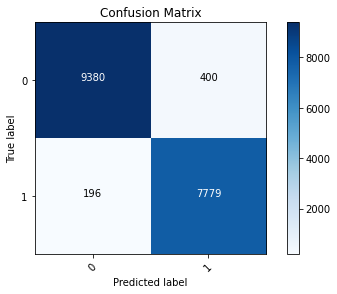

In [ ]:
plot_confusion_matrix(cm=cm,classes=[0,1] ,title='Confusion Matrix')

(3,)
(3,)


Text(0, 0.5, 'True Positive Rate')

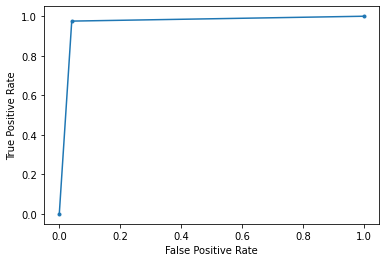

In [ ]:
from sklearn.metrics import roc_curve
#print(prediction.shape)
#prediction = prediction[:,1]
nb_fpr, nb_tpr,_= roc_curve(original,prediction)
#roc_auc = auc(lr_fpr, lr_tpr)
#print(nb_fpr)
#print(nb_tpr)
print(nb_fpr.shape)
print(nb_tpr.shape)
plt.plot(nb_fpr, nb_tpr,  marker='.', label='Naive Bayes' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
data1=pd.read_csv('...............')
data1.head()
dataset=data1.iloc[:,1:].values

In [ ]:
data2=[]
y=[]

In [ ]:
for i in range (0,648958):
  if(dataset[i][0][0]=='R' and dataset[i][0][1]=='T'):
    continue
  else:
    data2.append(dataset[i][0])
    y.append(dataset[i][3])


In [ ]:
for i in range(0,177546):
  if(y[i]>0.0):
    y[i]=1
  else:
    y[i]=0

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,177546):
  review = re.sub('[^a-zA-Z]', ' ', data2[i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 400)
x = cv.fit_transform(corpus).toarray()
#y = data.iloc[:, 0].values
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=42)
classifier.fit(x_train, y_train)

y_pred = classifier.predict_proba(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train, y_train) 
y_pred1=classifier1.predict_proba(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier2=MultinomialNB()
classifier2.fit(x_train, y_train)
y_pred2=classifier2.predict_proba(x_test)

In [ ]:
from sklearn.svm import LinearSVC 
classifier3=LinearSVC(random_state=42)
classifier3.fit(x_train, y_train)
y_pred3=classifier3.decision_function(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
from sklearn.linear_model import  SGDClassifier
classifier4 =  SGDClassifier(random_state=42)
classifier4.fit(x_train, y_train) 
y_pred4 = classifier4.decision_function(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
classifier5=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier5.fit(x_train, y_train)
y_pred5=classifier5.predict_proba(x_test)

17755
(17755, 2)
(834,)
(834,)


Text(0, 0.5, 'True Positive Rate')

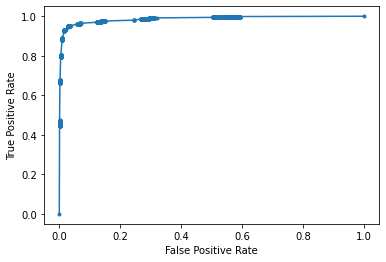

In [ ]:
from sklearn.metrics import roc_curve
print(len(y_pred))

print(y_pred.shape)
y_pred = y_pred[:,1]
rad_fpr, rad_tpr,_= roc_curve(y_test,y_pred)
#roc_auc = auc(lr_fpr, lr_tpr)
print(rad_fpr.shape)
print(rad_tpr.shape)
plt.plot(rad_fpr, rad_tpr,  marker='.', label='Random Forest' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(17755,)
(6508,)
(6508,)


Text(0, 0.5, 'True Positive Rate')

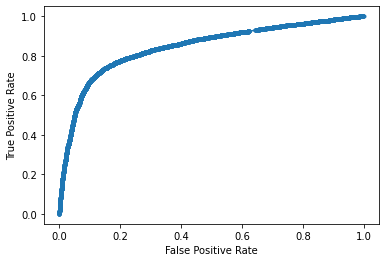

In [ ]:
from sklearn.metrics import roc_curve
y_pred1 = y_pred1[:,1]
print(y_pred1.shape)
lr_fpr, lr_tpr,_= roc_curve(y_test,y_pred1)
#roc_auc = auc(lr_fpr, lr_tpr)
print(lr_fpr.shape)
print(lr_tpr.shape)
plt.plot(lr_fpr, lr_tpr,  marker='.', label='Logistic' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(17755, 2)
(6957,)
(6957,)


Text(0, 0.5, 'True Positive Rate')

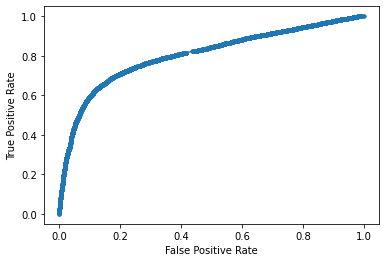

In [ ]:
from sklearn.metrics import roc_curve
print(y_pred2.shape)
y_pred2 = y_pred2[:,1]
nb_fpr, nb_tpr,_= roc_curve(y_test,y_pred2)
#roc_auc = auc(lr_fpr, lr_tpr)
print(nb_fpr.shape)
print(nb_tpr.shape)
plt.plot(nb_fpr, nb_tpr,  marker='.', label='Naive Bayes' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(17755,)
(6957,)
(6957,)


Text(0, 0.5, 'True Positive Rate')

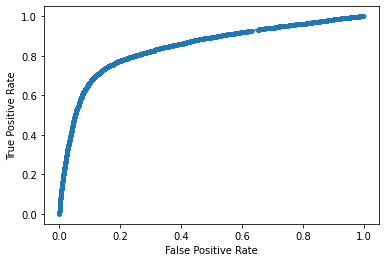

In [ ]:
print(y_pred3.shape)
#y_pred3 = y_pred3[:,1]
svm_fpr, svm_tpr,_= roc_curve(y_test,y_pred3)
#roc_auc = auc(lr_fpr, lr_tpr)
print(nb_fpr.shape)
print(nb_tpr.shape)
plt.plot(svm_fpr, svm_tpr,  marker='.', label='SVM' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(17755,)
(6329,)
(6329,)


Text(0, 0.5, 'True Positive Rate')

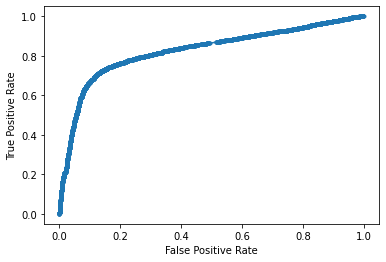

In [ ]:
from sklearn.metrics import roc_curve
print(y_pred4.shape)
#y_pred4 = y_pred4[:,1]
SGD_fpr, SGD_tpr,_= roc_curve(y_test,y_pred4)
#roc_auc = auc(lr_fpr, lr_tpr)
print(SGD_fpr.shape)
print(SGD_tpr.shape)
plt.plot(SGD_fpr, SGD_tpr,  marker='.', label='SGDC' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(17755, 2)
(101,)
(101,)


Text(0, 0.5, 'True Positive Rate')

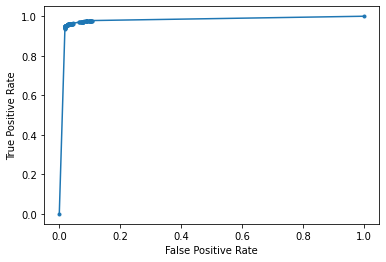

In [ ]:

from sklearn.metrics import roc_curve
print(y_pred5.shape)
y_pred5 = y_pred5[:,1]
dt_fpr, dt_tpr,_= roc_curve(y_test,y_pred5)
#roc_auc = auc(lr_fpr, lr_tpr)
print(dt_fpr.shape)
print(dt_tpr.shape)
plt.plot(dt_fpr, dt_tpr,  marker='.', label='Decision Tree' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

(3,)
(3,)


Text(0, 0.5, 'True Positive Rate')

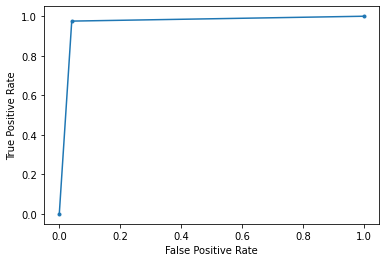

In [ ]:
from sklearn.metrics import roc_curve
#print(prediction.shape)
#prediction = prediction[:,1]
ls_fpr, ls_tpr,_= roc_curve(original,prediction)
#roc_auc = auc(lr_fpr, lr_tpr)
#print(nb_fpr)
#print(nb_tpr)
print(ls_fpr.shape)
print(ls_tpr.shape)
plt.plot(ls_fpr, ls_tpr,  marker='.', label='LSTM' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend

# show the plot

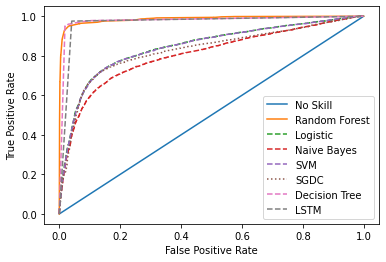

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)


plt.plot(ns_fpr, ns_tpr, linestyle='-', label='No Skill')
plt.plot(rad_fpr, rad_tpr,  linestyle='-', label='Random Forest' )
plt.plot(lr_fpr, lr_tpr,  linestyle='--', label='Logistic' )
plt.plot(nb_fpr, nb_tpr,  linestyle='--', label='Naive Bayes' )
plt.plot(svm_fpr, svm_tpr,  linestyle='--', label='SVM' )
plt.plot(SGD_fpr, SGD_tpr,  linestyle='dotted', label='SGDC' )
plt.plot(dt_fpr, dt_tpr,  linestyle='--', label='Decision Tree' )
plt.plot(ls_fpr, ls_tpr,  linestyle='--', label='LSTM' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()